In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

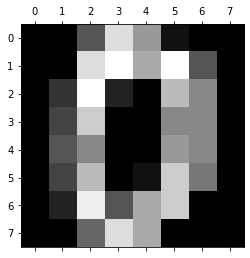

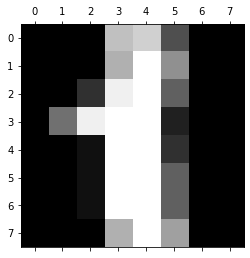

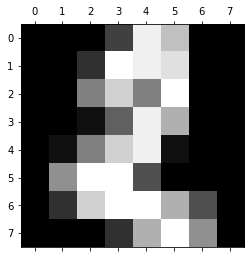

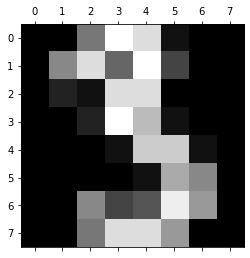

In [4]:
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i])

In [6]:
#creating df
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
#appending target column to df
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [13]:
#seperating dependent and independent var
X=df.drop('target', axis='columns')
Y=df.target

In [14]:
#splitting df
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [22]:
#n_estimators indicates number of decision trees- vary it to get suitable accuracy
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20)

In [23]:
#training
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=20)

In [19]:
model.score(X_train, Y_train)

0.9993041057759221

## confusion matrix 

In [25]:
Y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
cm

array([[34,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 36,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 35,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 37]], dtype=int64)

Text(69.0, 0.5, 'Truth')

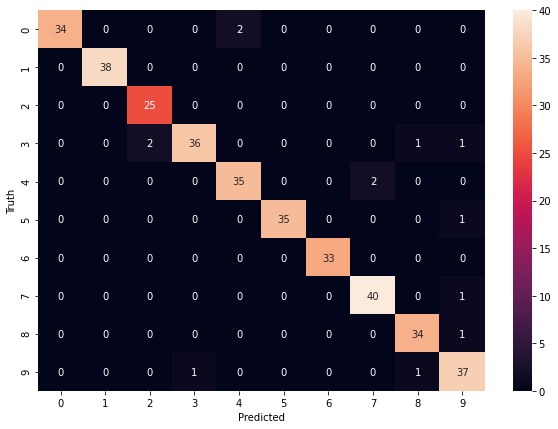

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')